### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import tensorflow as tf

from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
KEY = "e46970bde5460c8e6caece2452083771f7320e41"

In [3]:
filename = 'D:\\Sandbox\\Github\\Data\\AAPL.csv'
df = pdr.get_data_tiingo('AAPL', api_key = KEY)
df.to_csv(filename)
df=pd.read_csv(filename)
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-01-04 00:00:00+00:00,105.35,105.368,102.00,102.61,67649387,24.397857,24.402026,23.622035,23.763304,270597548,0.0,1.0
1,AAPL,2016-01-05 00:00:00+00:00,102.71,105.850,102.41,105.75,55790992,23.786463,24.513651,23.716987,24.490493,223163968,0.0,1.0
2,AAPL,2016-01-06 00:00:00+00:00,100.70,102.370,99.87,100.56,68457388,23.320970,23.707723,23.128752,23.288548,273829552,0.0,1.0
3,AAPL,2016-01-07 00:00:00+00:00,96.45,100.130,96.43,98.68,81094428,22.336719,23.188965,22.332087,22.853161,324377712,0.0,1.0
4,AAPL,2016-01-08 00:00:00+00:00,96.96,99.110,96.76,98.55,70798016,22.454829,22.952744,22.408511,22.823055,283192064,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-12-23 00:00:00+00:00,130.96,132.430,130.7800,132.16,88223692,130.96,132.430,130.7800,132.16,88223692,0.0,1.0
1254,AAPL,2020-12-24 00:00:00+00:00,131.97,133.460,131.1000,131.32,54930064,131.97,133.460,131.1000,131.32,54930064,0.0,1.0
1255,AAPL,2020-12-28 00:00:00+00:00,136.69,137.340,133.5100,133.99,123124632,136.69,137.340,133.5100,133.99,123124632,0.0,1.0
1256,AAPL,2020-12-29 00:00:00+00:00,134.87,138.789,134.3409,138.05,121047324,134.87,138.789,134.3409,138.05,121047324,0.0,1.0
1257,AAPL,2020-12-30 00:00:00+00:00,133.72,135.990,133.4000,135.58,96452124,133.72,135.990,133.4000,135.58,96452124,0.0,1.0


In [5]:
df1 = df.reset_index()['close']

In [6]:
df1

0       105.35
1       102.71
2       100.70
3        96.45
4        96.96
         ...  
1253    130.96
1254    131.97
1255    136.69
1256    134.87
1257    133.72
Name: close, Length: 1258, dtype: float64

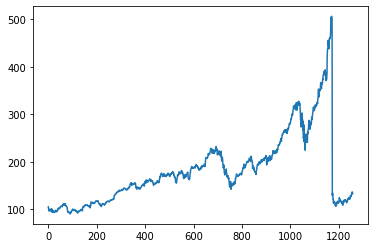

In [7]:
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size

In [10]:
train_data = df1[0:training_size,:] 
test_data = df1[training_size:len(df1),:1]

In [11]:
training_size, test_size

(817, 441)

In [12]:
time_step = 100

In [16]:
generator = TimeseriesGenerator(train_data, 
                                train_data,
                                length = time_step, 
                                sampling_rate = 1, 
                                batch_size = 1)

validation_generator = TimeseriesGenerator(test_data, 
                                           test_data, 
                                           length = time_step, 
                                           batch_size = 1)
print(len(generator))
print(len(validation_generator))

717
341


In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(generator,
          epochs = 100,
          validation_data = validation_generator)

Epoch 1/100
717/717 [==============================] - 21s 16ms/step - loss: 0.0018 - val_loss: 0.0124
Epoch 2/100
717/717 [==============================] - 10s 14ms/step - loss: 2.8642e-04 - val_loss: 0.0074
Epoch 3/100
717/717 [==============================] - 10s 15ms/step - loss: 2.4267e-04 - val_loss: 0.0067
Epoch 4/100
717/717 [==============================] - 10s 15ms/step - loss: 1.8603e-04 - val_loss: 0.0065
Epoch 5/100
717/717 [==============================] - 10s 15ms/step - loss: 1.4288e-04 - val_loss: 0.0032
Epoch 6/100
717/717 [==============================] - 11s 15ms/step - loss: 1.2899e-04 - val_loss: 0.0050
Epoch 7/100
717/717 [==============================] - 11s 15ms/step - loss: 1.1396e-04 - val_loss: 0.0030
Epoch 8/100
717/717 [==============================] - 11s 15ms/step - loss: 1.3169e-04 - val_loss: 0.0027
Epoch 9/100
717/717 [==============================] - 10s 15ms/step - loss: 6.7858e-05 - val_loss: 0.0059
Epoch 10/100
717/717 [===================

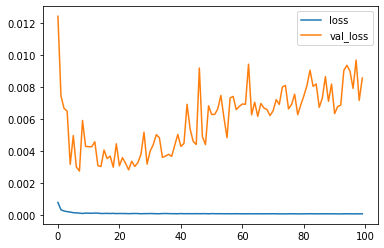

In [19]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [20]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [42]:
#my_model = tf.keras.models.load_model('saved_model/my_model')
#my_model.summary()

In [21]:
n_features = 1
train_predictions = []
first_step = train_data[-time_step:]
current_step = first_step.reshape((1, time_step, n_features))

In [22]:
for i in range(training_size):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_prediction = model.predict(current_step)[0]

    train_predictions.append(current_prediction) 
    
    # update batch to now include prediction and drop first value
    current_step = np.append(current_step[:,1:,:],[[current_prediction]],axis=1)

In [28]:
test_predictions = []
first_step = test_data[-time_step:]
current_step = first_step.reshape((1, time_step, n_features))

for i in range(test_size):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_prediction = model.predict(current_step)[0]

    test_predictions.append(current_prediction) 
    
    # update batch to now include prediction and drop first value
    current_step = np.append(current_step[:,1:,:],[[current_prediction]],axis=1)

In [29]:
print(training_size)
print(len(train_predictions))
print(test_size)
print(len(test_predictions))
print(len(df1))
print(training_size + test_size)

817
817
441
441
1258
1258


In [30]:
true_train_predictions = scaler.inverse_transform(train_predictions)
true_test_predictions = scaler.inverse_transform(test_predictions)

In [31]:
### Calculate RMSE performance metrics
print(math.sqrt(mean_squared_error(train_data, true_train_predictions)))
### Test Data RMSE
print(math.sqrt(mean_squared_error(train_data,true_train_predictions)))
### Calculate RMSE performance metrics
print(math.sqrt(mean_squared_error(test_data, true_test_predictions)))
### Test Data RMSE
print(math.sqrt(mean_squared_error(test_data,true_test_predictions)))

186.04376846683567
186.04376846683567
181.28569052291786
181.28569052291786


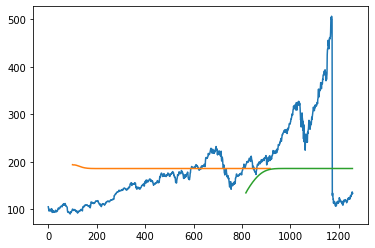

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(true_train_predictions)+look_back, :] = true_train_predictions
trainPredictPlot[100:917, :] = true_train_predictions
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[816:1257, :] = true_test_predictions
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
future_predictions = []
n_future_steps = 30
first_step = test_data[341:]
current_step = first_step.reshape((1, time_step, n_features))

for i in range(n_future_steps):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_prediction = model.predict(current_step)[0]

    future_predictions.append(current_prediction) 
    
    # update batch to now include prediction and drop first value
    current_step = np.append(current_step[:,1:,:],[[current_prediction]],axis=1)

In [ ]:
#future_predictions = np.array(future_predictions)
#type(future_predictions)

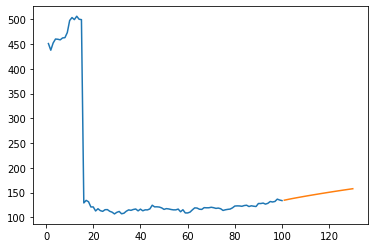

In [38]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(future_predictions))

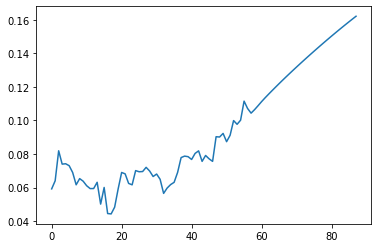

In [39]:
df3=df1.tolist()
df3.extend(future_predictions)
plt.plot(df3[1200:])

In [40]:
df3=scaler.inverse_transform(df3).tolist()

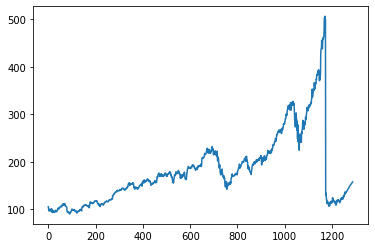

In [41]:
plt.plot(df3)